# 4.1 Binary Classification

In [106]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [107]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [108]:
# A review, where each word has been encoded as an integer
print(train_data[0])

# Whether a particular review is "positive" (i.e. 1) or "negative" (i.e. 0)
print(train_labels[0])

# No review will exceed 10,000 words because we specified this with num_words=10000 in previous cell
max([max(review) for review in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


9999

## 4.1.2

In [109]:
# dictionary mapping words to integer index
word_index = imdb.get_word_index()

In [110]:
# dictionary mapping integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Offset by 3 because 0, 1, 2 are reserved for "padding", "start of sequence" and "unknown"
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Vectorising the data use multi-hot encoding

In [111]:
def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

print(x_train[0])

# Also vectorise the labels. Easy since they're already 0 or 1
y_train = np.asarray(train_labels).astype("float32")
print(train_labels[0])
print(y_train[0])

y_test = np.asarray(test_labels).astype("float32")

[0. 1. 1. ... 0. 0. 0.]
1
1.0


## 4.1.3

* Our input data are vectors
* Our outputs are scalar labels (1s and 0s)

A fully-connected (or `Dense`ly connected) network of layers with `relu` activations will work well here.

We now need to decide:
* How many layers to use. We will use 2 "hidden" or intermediate layers
* How many units to choose for each layer. We will use 16 units in each hidden layer, and 1 output unit

In [113]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

* Having 16 units in first hidden layers, means that the weight matrix $W$ will have shape `(input_dimension, 16)`
* The dot product with $W$ will project the input data onto a 16-dimensional representation space, before the bias vector `b` is added and `relu` is applied.
* More units means a higher dimensional representation space. In general, this allows the model to learn more complex representations.
* The sigmoid function in the final layers enables the network to output a probability. In this case, how likely a sample is to have the target "1": i.e. how likely a review is to be positive.

A few more modelling decisions:
* Loss: we will use the `binary_crossentropy` loss. This is usually the best choice when dealing with models that output probabilities
* Crossentropy: This comes from information theory and measures the distance between probability distributions. In our case, it measures the distance between our ground-truth distribution and our predictions

In [114]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 4.1.4

In [115]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [116]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5623 - accuracy: 0.7559 - val_loss: 0.4393 - val_accuracy: 0.8524
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3356 - accuracy: 0.8971 - val_loss: 0.3179 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2390 - accuracy: 0.9266 - val_loss: 0.2989 - val_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1839 - accuracy: 0.9422 - val_loss: 0.2763 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1486 - accuracy: 0.9529 - val_loss: 0.2782 - val_accuracy: 0.8915
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1171 - accuracy: 0.9662 - val_loss: 0.2978 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0978 - accuracy: 0.9715 - val_loss: 0.3080 - val_accuracy: 0.8840
Epoch 8/20
30/30 [=

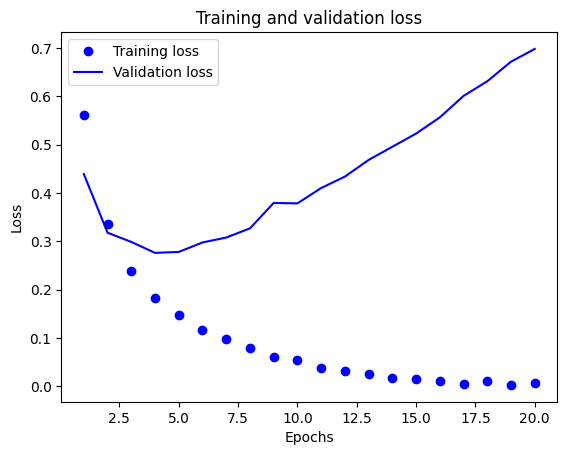

In [118]:
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

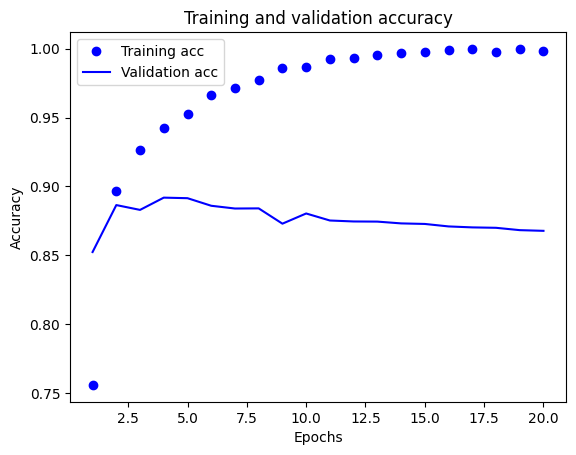

In [119]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Train and test a new model from scratch

In [121]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4717 - accuracy: 0.8246
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2053 - accuracy: 0.9279
Epoch 4/4
49/49 [==============================] - 0s 4ms/step - loss: 0.1727 - accuracy: 0.9394


In [122]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 763us/step - loss: 0.2920 - accuracy: 0.8846


## 4.1.5

In [123]:
# This outputs probability that each review is positive (close to 1) or negative (close to 0)
predictions = model.predict(x_test)
print(predictions)

782/782 [==============================] - 1s 658us/step
[[0.21309178]
 [0.9999255 ]
 [0.78359836]
 ...
 [0.13113463]
 [0.07434634]
 [0.6094322 ]]


# 4.2 Single-label Multiclass Classification

In [147]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import copy

## 4.2.1

In [125]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(train_data.shape)
print(test_data.shape)
print(train_data[10])

(8982,)
(2246,)
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [126]:
word_index = reuters.get_word_index()

In [127]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Indices offset by 3 because 0, 1 and 2 are reserved for "padding", "start of sequence" and "unknown"
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

# Possible labels: 0 to 45. Labels indicate a particular topic index
print(train_labels[10])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


## 4.2.2

In [132]:
# Vectorise the data, reusing code from section 4.1
x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

# Vectorise train labels using one hot (i.e. categorical) encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# Alternatively, use keras built-in one hot encoder:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In 4.1 we used hidden layers with 16 hidden units (i.e. 16-dimensional hidden/intermediate layers). In this example, we are trying to classify 46 classes, not just 2 classes as in 4.1. Hence, we will need more hidden units in order to avoid layer's "losing" information.

Note: information that is "lost" (i.e. unable to be represented due to not enough hidden units/dimensions), is permanently lost and deeper layers cannot recreate the lost information.

Thus, we use 64 hidden units

In [134]:
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=46, activation="softmax")
])

* The output layer has 46 hidden units (i.e. dimensions). Hence each entry this output vector encodes a particular output class.
* The `softmax` activation. The `softmax` function is a generalisation of the `sigmoid` function, to multiple classes.
* When we used sigmoid for the 2-class case, for a given sample the model would output a scalar `p` that denotes the probability that that sample would belong to class 1. Observer that `1 - p` would give us the probability of the sample for class 0.
* However, with `softmax` for a given sample the model now returns an 46-dimensional output vector, `output`, where `output[i]` is the probability of the sample belonging to the `i`-th class.
* And, `sum(output) = 1`, since it is a probability distribution
* The best loss function to use is then `categorical_crossentropy`, no longer `binary_crossentropy`

In [135]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 4.2.4

In [136]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [137]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 1.4206 - accuracy: 0.6907 - val_loss: 1.0400 - val_accuracy: 0.7780
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.7395 - accuracy: 0.8339 - val_loss: 0.9013 - val_accuracy: 0.7990
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.8961 - val_loss: 0.8669 - val_accuracy: 0.8270
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3256 - accuracy: 0.9270 - val_loss: 0.9188 - val_accuracy: 0.8210
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.9442 - val_loss: 1.0245 - val_accuracy: 0.8140
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.2129 - accuracy: 0.9509 - val_loss: 1.1538 - val_accuracy: 0.8090
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.1876 - accuracy: 0.9543 - val_loss: 1.1899 - val_accuracy: 0.8070
Epoch 

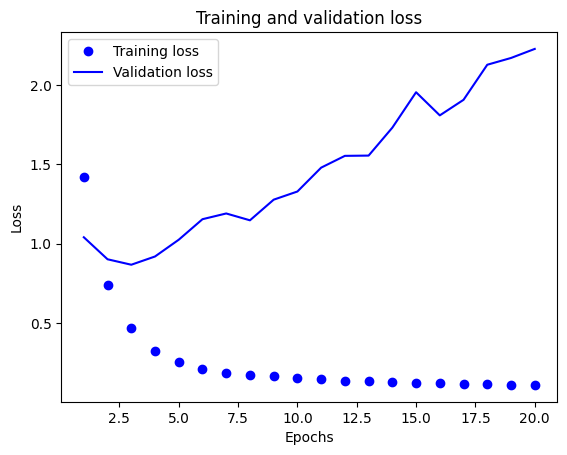

In [138]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

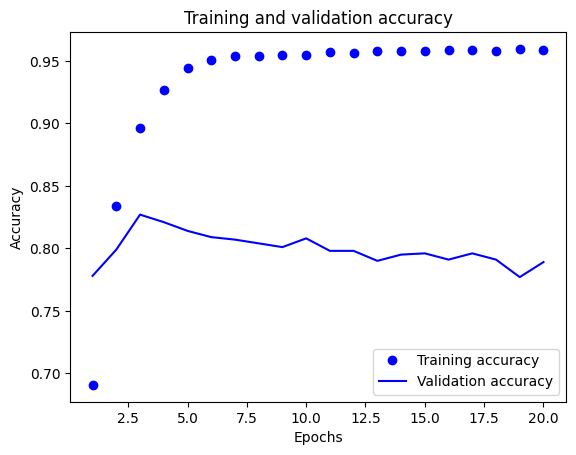

In [139]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Overfitting occurs after around the ninth epoch. Let's train a new model for 9 epochs.

In [142]:
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=46, activation="softmax")
])

In [145]:
model.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 10ms/step - loss: 2.6440 - accuracy: 0.5367
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 1.3827 - accuracy: 0.7126
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 1.0027 - accuracy: 0.7846
Epoch 4/9
18/18 [==============================] - 0s 10ms/step - loss: 0.7750 - accuracy: 0.8363
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6151 - accuracy: 0.8739
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4903 - accuracy: 0.8994
Epoch 7/9
18/18 [==============================] - 0s 10ms/step - loss: 0.3990 - accuracy: 0.9176
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.3298 - accuracy: 0.9299
Epoch 9/9
18/18 [==============================] - 0s 9ms/step - loss: 0.2756 - accuracy: 0.9391


In [146]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 [==============================] - 0s 771us/step - loss: 0.9576 - accuracy: 0.7947
[0.9575568437576294, 0.7947462201118469]


Random 46-class classifier baseline

In [148]:
test_labels_copy = copy.copy(test_labels)

# perform random shuffle
np.random.shuffle(test_labels_copy)

hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array.mean())

0.18788958147818344


So, a random classifer would be about 19% accurate. Our neural network was 80% accurate!

## 4.2.5

In [149]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 965us/step


Each entry in `predictions` is a vector of length 46, that sum to 1 (up to floating-point rounding). Thus they form a probability distribution.

In [160]:
print(predictions.shape)
print(predictions[0].shape)
print(np.sum(predictions[0]))

(2246, 46)
(46,)
0.9999999


The model predicts the fourth entry (i.e. index 3) as being the highest probability class for the $0$-th sample:

In [164]:
print(predictions[0])
print(np.max(predictions[0]))
print(np.argmax(predictions[0]))

[5.20550275e-05 1.91964078e-04 2.11657571e-05 6.57015741e-01
 3.31222713e-01 3.41700797e-05 9.62556624e-06 5.71172568e-05
 1.69198308e-03 5.04106574e-04 2.76346946e-05 1.74770795e-03
 2.59149179e-04 4.90882303e-06 4.12349109e-05 2.22018825e-05
 5.69931697e-04 7.13804679e-04 3.01687960e-05 8.50811251e-04
 1.32467784e-03 1.10138394e-03 5.67936368e-05 2.31953585e-04
 3.18202037e-05 2.20645466e-04 1.70015846e-05 1.25403685e-05
 6.66828419e-05 1.50768625e-04 4.87529978e-05 2.83895206e-04
 1.05373583e-04 3.63595200e-06 1.35162816e-04 2.15204236e-05
 5.06108801e-04 8.19401794e-06 2.48168872e-05 2.29703379e-04
 4.14129454e-06 2.05689488e-04 8.75658807e-05 4.27661980e-05
 1.19539379e-06 8.94819095e-06]
0.65701574
3


## 4.2.6

Rather than encoding the labels using one-hot encoding, we could have kept them integers and just cast them as integer tensors:

In [165]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

But, then we would have to use the `sparse_categorical_crossentropy` loss instead, which is still cross entropy but with a different interface:

In [166]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## 4.2.7

In general we should avoid having many hidden layers with fewer units than the output layer. This is precisely why when we had 46 output units, we used 64 hidden units in each hidden layer

# 4.3 Regression

In [167]:
from tensorflow.keras.datasets import boston_housing

## 4.3.1

In [170]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [173]:
print(train_data.shape)
print(test_data.shape)

print(train_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

Each of the 13 features, though numerical, take values in a different range. This is problematic.

To mitigate this, we can do feature-wise scaling/normalisation (i.e. "standardisation"):

$\frac{X_{j} - mean(X_{j})}{std(X_{j})}$ for each feature $j$.

This results in each feature vector/column having a mean of zero, and a standard deviation of 1

In [192]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# Normalisation of the test_data is done using training data. Don't use the test data, even for normalisation
test_data -= mean
test_data /= std

The next cell shows some scratch work that perform standardisation to scale some values to have a mean of 0, and a standard deviation of 1.

In [193]:
A = np.array([2, 5, 5, 3, 10, 2 ,1, 4])
mu = np.mean(A)
print(mu)

std = np.std(A)
print(std)

B = (A - mu) / std
print(B)
print(np.mean(B))
print(np.std(B))

4.0
2.6457513110645907
[-0.75592895  0.37796447  0.37796447 -0.37796447  2.26778684 -0.75592895
 -1.13389342  0.        ]
1.3877787807814457e-17
1.0


## 4.3.3

In [195]:
# We will be instantiating multiple models later on, within k-fold cross validation so we define the model as a function
def build_model():
    model = keras.Sequential([
        layers.Dense(units=64, activation="relu"),
        layers.Dense(units=64, activation="relu"),
        layers.Dense(units=1)
    ])
    model.compile(optimizer="rmsprop",
                  loss="mse",
                  metrics=["mae"])
    return model

The output layer does not have an activation function. That is, it is a linear layer. This is typical for scalar regression because it allows us the final layer to output a single continuous value.

Had we used an activation in the output layer, say `sigmoid`, then the final output would be restricted to the range 0 to 1.

MSE is a good loss for regression tasks

MAE is a useful metric. An MAE of 0.5 here tells us that the predictions are off by $500 on average

## 4.3.4

We now want to perform validation on our data. However, because our dataset is rather small instead of splitting into distinct training and validation sets, we will perform $k$-fold cross validation instead.

This involves splitting the training set into $k$-partitions or "blocks". Then each iteration, the $k$-th partition will be used as the validation set, whilst the remaining will be used as training set.

In [202]:
k = 4
num_val_samples = len(train_data) // k

In [203]:
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:],
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:],
    ], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
[1.9357469081878662, 2.372037172317505, 2.6895246505737305, 2.3401482105255127]
2.3343642354011536


Let's try training the model for 500 epochs

In [208]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:],
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:],
    ], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [209]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

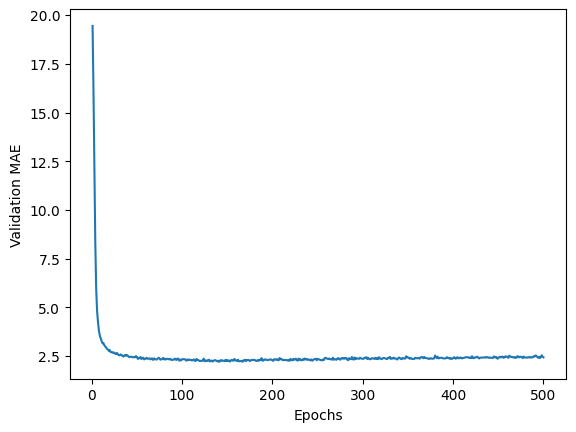

In [211]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The scaling of the graph is a little blown out by the first few points. Let's fix this:

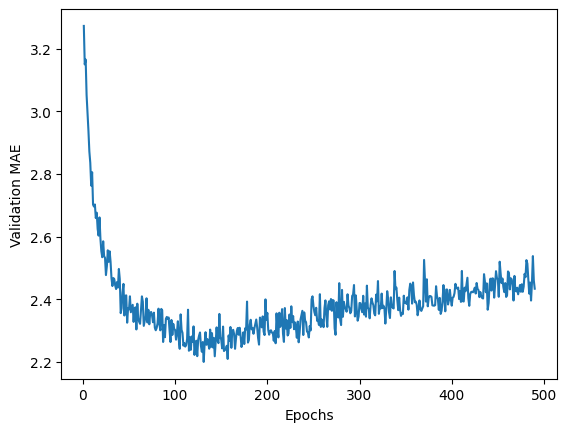

In [212]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

From this, we can more clearly see that overfitting appears to start occuring from around 120 epochs. Let's now train our final model:

In [217]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)

In [218]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 818us/step - loss: 14.6426 - mae: 2.5038
2.503829002380371


## 4.3.5

In [219]:
predictions = model.predict(test_data)
print(predictions[0])

4/4 [==============================] - 0s 947us/step
[8.492648]
